# 1. Lecture Overview

- The single-factor model
    - Systematic risk
    - Idiosyncratic risk
    - Beta
    - Alpha
    
    
- Application
    - Estimate the above quantities for a given stock
        - Requires the following packages:
            - 'pandas_datareader': we will use it to obtain data on market returns, risk-free rate, and other risk factors
            - 'statsmodels': we will use it to run regressions

# 2. The single-factor model

We have seem in previous lectures that some portion of a stock's total risk can be diversified away when the stock is part of a larger portfolio. This portion is often referred to as the stock's **idiosyncratic risk**. The remaining portion, which can not be diversified away is often called its **systematic risk**. 

The single-factor model is a statistical model which assumes that all sources of systematic risk (economic factors that affect all firms to some extent) are captured by the returns on the market portfolio. If this is the case, then we can quantify a firm's systematic and idiosyncratic risk by writing its excess returns as a linear function of market excess returns (for every firm $i$ and time $t$) plus some noise ($\epsilon_{i,t}$ below):

$$R_{i,t} - R_{f,t} = \alpha_i + \beta_i (R_{m,t} - R_{f,t}) + \epsilon_{i,t}$$

where:
- $R_{i,t}$ is the return of firm $i$ at time $t$
- $R_{m,t}$ is the return of the market at time $t$ (we generally use the S&P500 index as the market portfolio)
- $R_{f,t}$ is the risk-free rate at time $t$ (most commonly the yield on the 1-month Tbill)


- $\beta_i (R_{m,t} - R_{f,t})$ is the portion of the firm's return that is caused by systematic (undiversifiable) shocks
- $\epsilon_{i,t}$ is the portion of the firm's return that is caused by idiosyncratic (firm-specific, or diversifiable) shocks 


- $\beta_i$ tells us if the firm has more or less systematic risk than the average firm in the economy (average $\beta$ = 1)
- $\alpha_i$ tells us if the firm has offered a higher or lower return (on average) than what was warranted by its exposure to the market (its $\beta$)
    - If markets are efficient and the market perfectly captures all systematic shocks, then $\alpha$ should be zero for all firms at all times

# 3. Application

Use data for the past 10 years for TSLA, to calculate its $\alpha$, $\beta$, and the percentage of its risk that can be diversified away. For data on market returns and the risk-free rate, use the "pandas_datareader" to access this data on Ken French's website.

In [1]:
# Import packages
import pandas as pd
import yfinance as yf
import pandas_datareader as pdr
import statsmodels.api as sm
import matplotlib.pyplot as plt

### 3.1. Get data on the firm and clean it

In [2]:
# Download price data on TSLA and drop missing values
prices = yf.download('TSLA','2011-01-01','2020-12-31',interval = '1mo').dropna()
prices

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-01,5.368000,5.742000,4.474000,4.820000,4.820000,1.421005e+08
2011-02-01,4.862000,5.098000,4.222000,4.778000,4.778000,1.465175e+08
2011-03-01,4.810000,5.742000,4.354000,5.550000,5.550000,1.628165e+08
2011-04-01,5.490000,5.636000,4.840000,5.520000,5.520000,1.494745e+08
2011-05-01,5.520000,6.056000,5.104000,6.028000,6.028000,1.517440e+08
...,...,...,...,...,...,...
2020-08-01,289.839996,500.140015,273.000000,498.320007,498.320007,1.557378e+09
2020-09-01,502.140015,502.489990,329.880005,429.010010,429.010010,1.736285e+09
2020-10-01,440.760010,465.899994,379.109985,388.040009,388.040009,8.336664e+08


Date
2011-01-01         NaN
2011-02-01   -0.008714
2011-03-01    0.161574
2011-04-01   -0.005405
2011-05-01    0.092029
                ...   
2020-08-01    0.741452
2020-09-01   -0.139087
2020-10-01   -0.095499
2020-11-01    0.462736
2020-12-01    0.243252
Name: Adj Close, Length: 120, dtype: float64

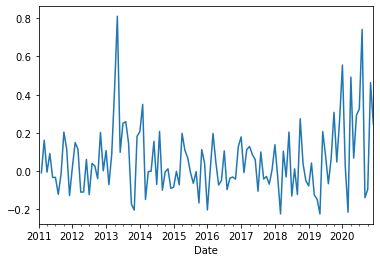

In [3]:
# Calculate TSLA returns from 'Adj Close' prices
tsla_returns = prices['Adj Close'].pct_change()
tsla_returns.plot();
tsla_returns

### 3.2. Get data on market returns, risk-free rate from Ken French

In [4]:
# From Ken French's database: Load the names of all the available datasets 
pdr.famafrench.get_available_datasets()[0:9] #print just the top 10

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME']

In [5]:
# Download the monthly Fama French factors (first item in the list)
ff3f = pdr.DataReader('F-F_Research_Data_Factors', 'famafrench', '2011-01-01')

# Take a look at the data
ff3f
#print(ff3f['DESCR'])

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 2011-01    1.99 -2.52  0.82  0.01
 2011-02    3.49  1.53  1.29  0.01
 2011-03    0.46  2.58 -1.76  0.01
 2011-04    2.90 -0.37 -2.43  0.00
 2011-05   -1.27 -0.58 -2.05  0.00
 ...         ...   ...   ...   ...
 2020-10   -2.10  4.44  4.03  0.01
 2020-11   12.47  5.48  2.11  0.01
 2020-12    4.63  4.81 -1.36  0.01
 2021-01   -0.04  7.19  2.85  0.00
 2021-02    2.79  2.11  7.07  0.00
 
 [122 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 2011    0.44  -5.79  -8.40  0.04
 2012   16.27  -1.02   9.97  0.06
 2013   35.20   6.85   2.53  0.02
 2014   11.71  -7.94  -1.52  0.02
 2015    0.08  -3.96  -9.50  0.02
 2016   13.30   6.53  22.86  0.20
 2017   21.51  -4.96 -13.84  0.80
 2018   -6.93  -3.15  -9.34  1.81
 2019   28.28  -6.26 -10.68  2.14
 2020   23.67  13.07 -47.20  0.44,
 'DESCR': 'F-F Research Data Factors\n-------------------------\n\nThis file was created by CMPT_ME_BEM

In [6]:
# Extract only the monthly table
index_data = ff3f[0]/100
index_data.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2011-01,0.0199,-0.0252,0.0082,0.0001
2011-02,0.0349,0.0153,0.0129,0.0001
2011-03,0.0046,0.0258,-0.0176,0.0001
2011-04,0.0290,-0.0037,-0.0243,0.0000
2011-05,-0.0127,-0.0058,-0.0205,0.0000


### 3.3. Combine the two datasets

In [7]:
# Check the index (date column) in each dataset
print(index_data.index)
print(tsla_returns.index)

PeriodIndex(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
             '2011-07', '2011-08', '2011-09', '2011-10',
             ...
             '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10',
             '2020-11', '2020-12', '2021-01', '2021-02'],
            dtype='period[M]', name='Date', length=122, freq='M')
DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='Date', length=120, freq=None)


In [8]:
# Convert the index in "tsla_returns" to "period('M')" (monthly)
tsla_returns.index = tsla_returns.index.to_period('M')
print(tsla_returns.index)

PeriodIndex(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
             '2011-07', '2011-08', '2011-09', '2011-10',
             ...
             '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
             '2020-09', '2020-10', '2020-11', '2020-12'],
            dtype='period[M]', name='Date', length=120, freq='M')


In [9]:
# Combine the datasets
full_data = index_data.join(tsla_returns)
full_data.head()

,Mkt-RF,SMB,HML,RF,Adj Close
Date,,,,,
2011-01,0.0199,-0.0252,0.0082,0.0001,NaN
2011-02,0.0349,0.0153,0.0129,0.0001,-0.008714
2011-03,0.0046,0.0258,-0.0176,0.0001,0.161574
2011-04,0.0290,-0.0037,-0.0243,0.0000,-0.005405
2011-05,-0.0127,-0.0058,-0.0205,0.0000,0.092029


In [10]:
# Rename 'Adj Close' to 'tsla_ret'
full_data.rename(columns={'Adj Close':'tsla_ret'}, inplace=True)
full_data.head()

,Mkt-RF,SMB,HML,RF,tsla_ret
Date,,,,,
2011-01,0.0199,-0.0252,0.0082,0.0001,NaN
2011-02,0.0349,0.0153,0.0129,0.0001,-0.008714
2011-03,0.0046,0.0258,-0.0176,0.0001,0.161574
2011-04,0.0290,-0.0037,-0.0243,0.0000,-0.005405
2011-05,-0.0127,-0.0058,-0.0205,0.0000,0.092029


In [11]:
# Get rid of missing values
full_data = full_data.dropna()
full_data.head()

,Mkt-RF,SMB,HML,RF,tsla_ret
Date,,,,,
2011-02,0.0349,0.0153,0.0129,0.0001,-0.008714
2011-03,0.0046,0.0258,-0.0176,0.0001,0.161574
2011-04,0.0290,-0.0037,-0.0243,0.0000,-0.005405
2011-05,-0.0127,-0.0058,-0.0205,0.0000,0.092029
2011-06,-0.0175,-0.0011,-0.0042,0.0000,-0.033510


### 3.4. Run regression

In [12]:
# Set the dependent variable (the variable on the left of the equal sign in the regression equation above)
y = full_data['tsla_ret'] - full_data['RF']
y

Date
2011-02   -0.008814
2011-03    0.161474
2011-04   -0.005405
2011-05    0.092029
2011-06   -0.033510
             ...   
2020-08    0.741352
2020-09   -0.139187
2020-10   -0.095599
2020-11    0.462636
2020-12    0.243152
Freq: M, Length: 119, dtype: float64

In [13]:
X = full_data['Mkt-RF']
X = sm.add_constant(X)
X

,const,Mkt-RF
Date,,
2011-02,1.0,0.0349
2011-03,1.0,0.0046
2011-04,1.0,0.0290
2011-05,1.0,-0.0127
2011-06,1.0,-0.0175
...,...,...
2020-08,1.0,0.0763
2020-09,1.0,-0.0363
2020-10,1.0,-0.0210


In [14]:
# Set up the regression model
model = sm.OLS(y, X, missing='drop')
model

In [15]:
# Run the regression (calculate alpha and beta)
results = model.fit()
results

In [16]:
# Print regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     23.17
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           4.46e-06
Time:                        20:08:55   Log-Likelihood:                 46.433
No. Observations:                 119   AIC:                            -88.87
Df Residuals:                     117   BIC:                            -83.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0358      0.016      2.276      0.0

In [17]:
# Diagnostics:
# Durbin-Watson: tests for residual autocorrelation.Takes values in [0,4], below(above) 2 = pos(neg) autocorr. 2 is perfect.
# Omnibus: tests normality of residuals. Prob(Omnibus) close to 0 means reject normality
# JB: another normality test (null is skew=0, kurt=3). Prob(JB) close to 0 means rejection of normality
# Cond. No: tests for multicollinearity. Over 100 is worriesome.

### 3.5. Interpreting the results: coefficients t-statistics and pvalues

The "const" row contains information about the firm's $\alpha$ and the "Mkt-RF" row contains information about the firm's $\beta$. The $\alpha$ and $\beta$ coefficient estimates themselves are in the "coef" column ($\alpha = 0.0358$, and $\beta = 1.768$). 

The t-statistics for the two coefficients are in the "t" column. Loosely speaking a t-statistic that larger than 2 or smaller than -2 allows us to conclude that the corresponding coefficient is statistically different from 0 (i.e. reject the null hypothesis that the coefficient is 0). 

The p-values are in the "P > |t|" column. P-values lower than 0.05 allow us to conclude that the corresponding coefficient is statistically different from 0 at the 95% confidence level (i.e. reject the null hypothesis that the coefficient is 0). At the 99% confidence level, we would need the p-value to be smaller than 1% (1 minus the confidence level) to reject the null hypothesis that alpha = 0. 

The last two columns give us the 95% confidence interval for each coefficient.

TSLA's alpha has a p-value of 0.025 so we can conclude that it's alpha is statistically significantly different from 0 at the 95% confidence level (but not at the 99% confidence level).

The fact that the alpha is positive (and statistically different from 0) means that, based on the single-index model, TSLA seems to be undervalued. A negative alpha would mean the stock in overvalued.

If we can not reject the null hypothesis that alpha is 0, the conclusion is NOT that alpha = 0 and therefore the stock is correctly valued (since we can never "accept" a null hypothesis, we can only fail to reject). The conclusion is that we do not have enough evidence to claim that the stock is either undervalued or overvalued (which is not the same thing as saying that we have enough evidence to claim that the stock is correctly valued).

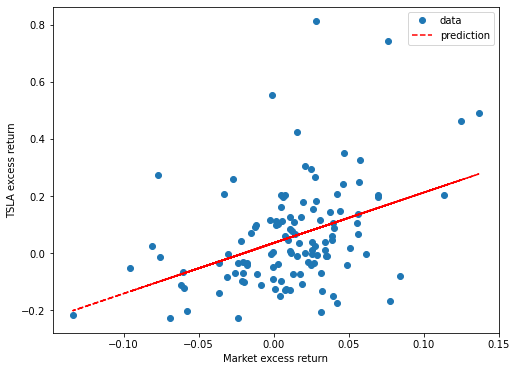

In [18]:
# Print regression plots
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(full_data['Mkt-RF'], y, 'o', label = 'data')
ax.plot(full_data['Mkt-RF'], results.fittedvalues, 'r--', label = 'prediction')

ax.set_xlabel('Market excess return')
ax.set_ylabel('TSLA excess return')
ax.legend(loc = 'best');

# alpha is the point where the red line intesects the vertical x = 0 line
#ax.axvline(x=0,color='k')

### 3.6 Accessing individual parts of the regression output

In [19]:
# Access the individual regression estimates
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initia

In [20]:
# The alpha and beta coefficients themselves
print(results.params, '\n')

# Just the beta
the_beta = results.params['Mkt-RF']
the_beta

const     0.035765
Mkt-RF    1.768008
dtype: float64 



1.7680077905392448

In [21]:
# The t-statistics of the coefficients
print(results.tvalues, '\n')

const     2.276056
Mkt-RF    4.813983
dtype: float64 



In [22]:
# The p-values of the coefficients
print(results.pvalues, '\n')

const     0.024662
Mkt-RF    0.000004
dtype: float64 



In [23]:
# The R-squared of the regression 
    #(tells us what proportion of the variation in the y variable is explained by variation in the X variable)
    #(in our regression, this is equivalent to: what proportion of TSLA return volatility are caused by market volatility)
    #(so in our regression, the R-squared tells us the proportion of TSLA risk that is systematic)
print(results.rsquared, '\n')

0.16532568528567537 



In [24]:
# Remember, if you need any of these values for later use, you need to store them as separate variables
alpha = results.params['const']
beta = results.params['Mkt-RF']
print(f'alpha = {alpha: .3f} \nbeta = {beta: .3f}')

alpha =  0.036 
beta =  1.768


### 3.7. Systematic vs idiosyncratic risk

The regression R-squared coefficient tells us the percentage of the firm's total risk (variance) that is systematic (can be diversified away).

The breakdown of the firm's total risk into systematic and idiosyncratic can also be easily calculated as below:

The regression equation

$$R_{i,t} - R_{f,t} = \alpha_i + \beta_i (R_{m,t} - R_{f,t}) + \epsilon_{i,t}$$

implies

$$Var(R_{i,t} - R_{f,t}) = Var(\alpha_i) + Var(\beta_i (R_{m,t} - R_{f,t})) + Var(\epsilon_{i,t})$$

which reduces to

$$Var(R_{i,t} - R_{f,t}) = \beta_{i}^2 Var(R_{m,t} - R_{f,t}) + Var(\epsilon_{i,t})$$


In [25]:
# Total risk of tesla (variance)
tot_risk  = y.var()
tot_risk

0.032415992463549044

In [26]:
# Systematic risk
sys_risk  = (beta**2) * full_data['Mkt-RF'].var() 
sys_risk

0.005359196168251542

In [27]:
# Idiosyncratic risk
idio_risk = tot_risk - sys_risk
idio_risk

0.027056796295297503

In [28]:
# Another way of calculating idiosyncratic risk (=variance of residuals (epsilon) from the regression )
idio_risk2 = results.resid.var()
idio_risk2

0.027056796295297517

In [29]:
# Print all three of them out
print(f'TSLA risk: \n total = {tot_risk: .4f} \n systematic = {sys_risk: .4f} \n idiosyncratic = {idio_risk: .4f}')

TSLA risk: 
 total =  0.0324 
 systematic =  0.0054 
 idiosyncratic =  0.0271


In [30]:
# Print as percentages of total risk
pct_sys_risk = sys_risk / tot_risk
pct_idio_risk = idio_risk / tot_risk
print(f'\n percent systematic risk = {pct_sys_risk: .4f} \n percent idiosyncratic risk = {pct_idio_risk: .4f}')


 percent systematic risk =  0.1653 
 percent idiosyncratic risk =  0.8347


**Example**

Regress excess returns of TSLA on excess returns on the market as well as the SMB and HML factors. What is the alpha and the beta of TSLA in this regression?

In [31]:
y = full_data['tsla_ret'] - full_data['RF']
X = full_data.loc[:,['Mkt-RF','SMB','HML']]
X = sm.add_constant(X)
X

,const,Mkt-RF,SMB,HML
Date,,,,
2011-02,1.0,0.0349,0.0153,0.0129
2011-03,1.0,0.0046,0.0258,-0.0176
2011-04,1.0,0.0290,-0.0037,-0.0243
2011-05,1.0,-0.0127,-0.0058,-0.0205
2011-06,1.0,-0.0175,-0.0011,-0.0042
...,...,...,...,...
2020-08,1.0,0.0763,-0.0025,-0.0294
2020-09,1.0,-0.0363,0.0006,-0.0251
2020-10,1.0,-0.0210,0.0444,0.0403


In [32]:
results3f = sm.OLS(y,X).fit()
print(results3f.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     8.316
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           4.72e-05
Time:                        20:08:56   Log-Likelihood:                 47.363
No. Observations:                 119   AIC:                            -86.73
Df Residuals:                     115   BIC:                            -75.61
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0316      0.016      1.949      0.0

# 4. Resources

- pandas_datareader for Ken French data
    - https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#fama-french
    
- linear regression with "statsmodels" package
    - https://www.statsmodels.org/stable/regression.html